In [0]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import zscore
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
import tensorflow as tf
import keras
import math as m
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded['Data.xlsx']))
dataset=df.values
X, y=np.split(dataset,[-1],axis=1)
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.1, random_state=42)

model=Sequential()
model.add(Dense(8,input_dim=8,kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal',activation='relu')) 
model.add(Dense(50, kernel_initializer='normal',activation='relu')) 
model.add(Dense(150, kernel_initializer='normal',activation='relu')) 
model.add(Dense(250, kernel_initializer='normal',activation='relu')) 

model.add(Dense(1,kernel_initializer='normal'))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=10)

pred=model.predict(X_test)
 
score=np.sqrt((metrics.mean_squared_error(pred,y_test)))
dataset










Saving barchabarchadata.xlsx to barchabarchadata (1).xlsx
Epoch 1/10
 4384/13572 [========>.....................] - ETA: 1s - loss: 0.0412

ValueError: ignored

Text(0.5, 1.0, 'sortie de la partie dynamique')

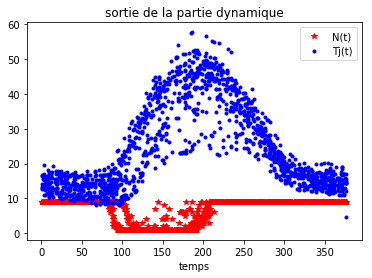

In [0]:
a=np.zeros(len(pred))

for i in range(len(pred)):
  if pred[i]<0 :
    pred[i]=0;
  a[i]=m.floor(8*m.exp(-pred[i]/0.1)+1)
  
p1=plt.plot(X_test[:,0],a,'r*')
p2=plt.plot(X_test[:,0],X_test[:,6],'b.')
plt.xlabel('temps')
plt.ylabel('')
plt.legend((p1[0], p2[0]), ('N(t)', 'Tj(t)'))
plt.title('sortie de la partie dynamique')

Text(0.5, 1.0, 'évolution du rendement du module en fonction du temps')

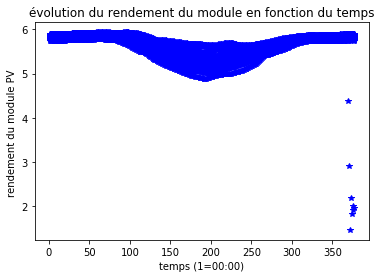

In [0]:
plt.plot(df.temps,df.V/50,'b*')
plt.xlabel('temps (1=00:00)')
plt.ylabel('rendement du module PV ')
plt.title ('évolution du rendement du module en fonction du temps')

Saving Classeur1.xlsx to Classeur1 (33).xlsx


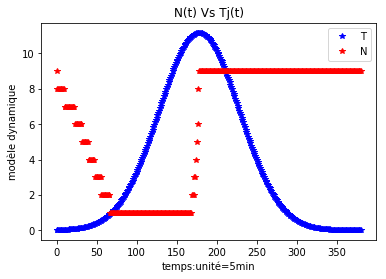

In [0]:
uploaded = files.upload()
df1 = pd.read_excel(io.BytesIO(uploaded['Classeur1.xlsx']))
dataset1=df1.values
grad=np.zeros((len(dataset1),1))
grad[0,0]=dataset1[len(dataset1)-1,0]-dataset1[0,0]
for i in range (379):
  grad[i+1,0]=dataset1[i+2,0]-dataset1[i+1,0]
for i in range(len(grad)):
  if grad[i,0]<0 :
    grad[i,0]=0;
  grad[i,0]=m.floor(8*m.exp(-grad[i,0]/0.1)+1)

plt.plot(dataset1/5,'b*')
plt.plot(grad[:,0],'r*')
plt.xlabel('temps:unité=5min')
plt.ylabel('modèle dynamique')
plt.title('N(t) Vs Tj(t)')
plt.legend('TN')